In [24]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


In [25]:
# Load the dataset
df = pd.read_csv('Data/Reviews.csv')
reviews = df['Text'].dropna()  # Drop any missing values in the 'Text' column


In [26]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Lowercase and remove punctuation
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(words)

# Apply preprocessing to the reviews
cleaned_reviews = reviews.apply(preprocess_text)


In [27]:
# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(cleaned_reviews)


In [28]:
# Define number of topics
num_topics = 5  # Adjust based on your dataset

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics)
lda_model.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=5)

In [29]:
# Function to display topics
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

# Display topics
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, num_words=10)


Topic #1:
product amazon love dog great price store treat time good
Topic #2:
taste like flavor good br great make product really chocolate
Topic #3:
food br cat dog eat like love ingredient product good
Topic #4:
coffee cup br like taste flavor good great make strong
Topic #5:
tea br flavor taste like oil green good bag hot


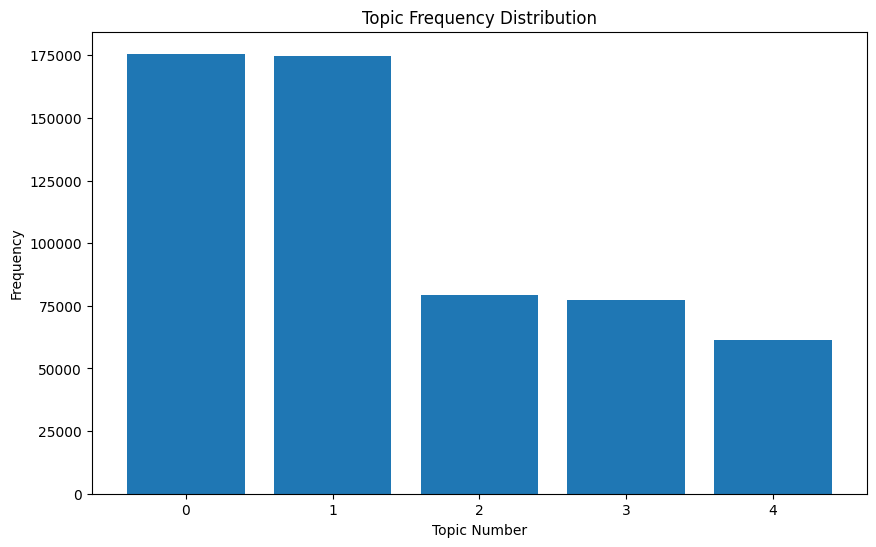

In [30]:
# Get the topic distribution for each document
topic_counts = [0] * lda_model.n_components
for topic_dist in lda_model.transform(doc_term_matrix):
    topic_counts[topic_dist.argmax()] += 1

# Plot topic frequency
plt.figure(figsize=(10, 6))
plt.bar(range(len(topic_counts)), topic_counts)
plt.title('Topic Frequency Distribution')
plt.xlabel('Topic Number')
plt.ylabel('Frequency')
plt.show()


In [31]:
# Get the dominant topic for each review
topic_assignments = lda_model.transform(doc_term_matrix)
df['Dominant_Topic'] = topic_assignments.argmax(axis=1)

# Display some example reviews with assigned topics
print(df[['Text', 'Dominant_Topic']].head())


                                                Text  Dominant_Topic
0  I have bought several of the Vitality canned d...               2
1  Product arrived labeled as Jumbo Salted Peanut...               0
2  This is a confection that has been around a fe...               0
3  If you are looking for the secret ingredient i...               1
4  Great taffy at a great price.  There was a wid...               0


In [32]:
topic_counts = df['Dominant_Topic'].value_counts(normalize=True)
print(topic_counts)


Dominant_Topic
0    0.308905
1    0.307013
2    0.139825
3    0.136277
4    0.107981
Name: proportion, dtype: float64


In [33]:
df.to_csv('Amazon_Reviews_with_Topics.csv', index=False)


In [34]:
for topic_num in range(lda_model.n_components):
    print(f"\nSample reviews for Topic {topic_num + 1}:")
    print(df[df['Dominant_Topic'] == topic_num]['Text'].head(3))  # Display 3 examples per topic



Sample reviews for Topic 1:
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

Sample reviews for Topic 2:
3     If you are looking for the secret ingredient i...
7     This taffy is so good.  It is very soft and ch...
14    The Strawberry Twizzlers are my guilty pleasur...
Name: Text, dtype: object

Sample reviews for Topic 3:
0    I have bought several of the Vitality canned d...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object

Sample reviews for Topic 4:
30    I have never been a huge coffee fan. However, ...
54    I roast at home with a stove-top popcorn poppe...
55    We roast these in a large cast iron pan on the...
Name: Text, dtype: object

Sample reviews for Topic 5:
10    I don't know if it's the cactus or the tequila...
18    Twizzlers, Strawberry m

In [35]:
import pickle

# Save the LDA model
with open("lda_model.pkl", "wb") as file:
    pickle.dump(lda_model, file)

# Save the CountVectorizer
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)


In [36]:
def predict_topic(review_text, model_path="lda_model.pkl", vectorizer_path="vectorizer.pkl"):
    # Load the saved model and vectorizer
    with open(model_path, "rb") as file:
        lda_model = pickle.load(file)
    with open(vectorizer_path, "rb") as file:
        vectorizer = pickle.load(file)
    
    # Preprocess the review (reuse your preprocess_text function)
    processed_text = preprocess_text(review_text)
    text_vectorized = vectorizer.transform([processed_text])
    
    # Predict topic
    topic_dist = lda_model.transform(text_vectorized)
    dominant_topic = topic_dist.argmax()
    return dominant_topic, topic_dist


In [37]:
pip show numpy


Name: numpy
Version: 2.1.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRI

In [38]:
import pickle
import numpy as np

# Re-save model with the current numpy version
with open("lda_model.pkl", "wb") as file:
    pickle.dump(lda_model, file)


In [39]:
import joblib
joblib.dump(lda_model, 'lda_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')


['vectorizer.joblib']